<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

### Carga de los archivos de datos

Lo primero que se debe realizar es la carga de los archivos en formato .txt y observar las variables presentadas en cada uno de estos archivos. Cabe anotar que solo se tendrán en cuenta archivos desde el 2019-1 debido a que se considera que los últimos 2 años son suficientes para observar tendencias en los comportamientos de los estudiantes del icfes, adicionalmente, se puede observar consistencia en las columnas de estos archivos, cosa que no sucede con toda esta informacion. Por último, se decide solo contar con el primer semestre de estos periodos debido a la imposibilidad de cargar esta gran base de datos a github, sin embargo, todo el proceso se cumpliría de la misma forma si simplemente se agregan más archivos de texto a la carpeta lab_2

In [1]:
#Carga de todos los archivos
import glob, os
import warnings
import pandas as pd

warnings.filterwarnings("ignore")
file_list = []
for file in glob.glob("./Archivos/lab_2/*.txt"):
    file_list.append(file.split('\\')[1])
    
for i in file_list:
    nombre = i.split('.')[0]
    globals()[nombre] = pd.read_csv("./Archivos/lab_2/" + i, sep="¬",encoding = 'utf-8',error_bad_lines=False)

In [2]:
variables = [SB11_20191,SB11_20201]
#Creación del dataframe
df = pd.DataFrame(columns=SB11_20191.columns)
for i in variables:
    df = df.append(i)

#### Inspección del dataframe

Se realiza una inspección básica donde se quiere observar el número de filas, columnas, y los tipos de datos que almacena, además de observar si existen faltantes en este dataframe

In [3]:
print('numero de filas:', len(df))
print('numero de columnas:', len(df.columns))

numero de filas: 36518
numero de columnas: 82


In [4]:
print('Existen los siguientes tipos de datos en el dataframe:')
df.dtypes.value_counts()

Existen los siguientes tipos de datos en el dataframe:


object     77
float64     5
dtype: int64

Para la detección de faltantes es importante tener en cuenta de que si los faltantes constituyen menos del 5% de los datos, podrían ser eliminados con facilidad, sin embargo, observamos que existen varias columnas que llegan hasta el 8%. Debido al scope de este proyecto, se deciden eliminar todas las filas con algún faltante reportado, sin embargo, cabe resaltar que la columna ESTU_ETNIA presenta más del 99% de sus datos como faltantes, y a pesar de que nos puede dar información muy valiosa, esta estará sesgada por el desbalance del dataframe, por lo cual se decide eliminar por completo esta columna

In [5]:
serie = df.isnull().sum()*100.0/len(df)
serie[serie>5]

ESTU_ETNIA                       99.389342
FAMI_ESTRATOVIVIENDA              8.157621
FAMI_PERSONASHOGAR                6.051810
FAMI_CUARTOSHOGAR                 6.273618
FAMI_EDUCACIONPADRE               7.924859
FAMI_EDUCACIONMADRE               7.861876
FAMI_TRABAJOLABORPADRE            6.418752
FAMI_TRABAJOLABORMADRE            6.328386
FAMI_TIENEINTERNET                7.952243
FAMI_TIENESERVICIOTV              8.080946
FAMI_TIENECOMPUTADOR              6.216113
FAMI_TIENELAVADORA                6.281834
FAMI_TIENEHORNOMICROOGAS          6.391369
FAMI_TIENEAUTOMOVIL               6.478997
FAMI_TIENEMOTOCICLETA             6.407799
FAMI_TIENECONSOLAVIDEOJUEGOS      6.454351
FAMI_NUMLIBROS                    9.652774
FAMI_COMELECHEDERIVADOS           8.697081
FAMI_COMECARNEPESCADOHUEVO        8.072731
FAMI_COMECEREALFRUTOSLEGUMBRE     8.149406
FAMI_SITUACIONECONOMICA           6.388630
ESTU_DEDICACIONLECTURADIARIA      7.996057
ESTU_DEDICACIONINTERNET           8.102853
ESTU_HORASS

In [6]:
df = df.drop('ESTU_ETNIA', axis = 1)
df = df.dropna(axis=0)

In [7]:
print('Nuevo numero de filas:', len(df))
print('Nuevo numero de columnas:', len(df.columns))

Nuevo numero de filas: 24924
Nuevo numero de columnas: 81


Se analiza cuáles son las posibles columnas de interés, entendiendo que se quiere explicar el desempeño en las pruebas saber a partir de diferentes datos de los estudiantes.

In [8]:
pd.set_option('display.max_columns', None)
df.head(2)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,F,07/12/2000,20191,SB11201910008548,ESTUDIANTE,COLOMBIA,No,VALLE,76.0,CALI,76001.0,Estrato 4,3 a 4,Cuatro,Técnica o tecnológica incompleta,Secundaria (Bachillerato) completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,Si,Si,No,No,No,0 A 10 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,Todos o casi todos los días,Mejor,Entre 1 y 2 horas,Entre 1 y 3 horas,0,No,114686,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,S,URBANO,NOCHE,76001,CALI,76,VALLE,N,76001,CALI,VALLE,76,50,29,2,49,31,2,47,33,2,40,22,1,54,39,A1,235,29,58.199483,3.0,3.0,PUBLICAR,NO
1,CC,COLOMBIA,F,23/03/1998,20191,SB11201910004475,ESTUDIANTE,COLOMBIA,No,VALLE,76.0,CALI,76001.0,Estrato 3,7 a 8,Cuatro,Técnica o tecnológica completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,No,No,No,No,11 A 25 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,Nunca o rara vez comemos eso,Mejor,No leo por entretenimiento,Entre 1 y 3 horas,0,No,114686,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,S,URBANO,NOCHE,76001,CALI,76,VALLE,N,76001,CALI,VALLE,76,53,35,3,45,25,2,44,27,2,34,10,1,35,10,A-,217,21,51.018527,2.0,3.0,PUBLICAR,NO


Se observa en este dataframe que hay diferentes tipos de variable:

1. información personal del individuo que presenta la prueba (no relevante para el problema)
2. información de su estilo de vida y lugar de residencia (altamente relevante)
3. Información de dedicación escolar (Relevante)
4. Información del colegio (Solamente nos podría interesar si la ubicación es urbana o rural debido a los evidentes problemas de conectividad y acceso a la educación digna por fuera de los perímetros urbanos)
5. Puntaje de la prueba saber 11 (Altamente relevante, variable a explicar)

En este caso, las variables que pueden explicar el comportamiento del puntaje del ICFES pueden ser:

- Genero (ESTU_GENERO)
- Edad (ESTU_FECHANACIMIENTO)
- Departamento (ESTU_DEPTO_RESIDE)
- Estrato (FAMI_ESTRATOVIVIENDA)
- Servicio de internet (FAMI_TIENEINTERNET)
- Servicio de computadora (FAMI_TIENECOMPUTADOR)
- Si la escuela es rural o urbana (COLE_AREA_UBICACION)

Y la variable de respuesta a tener en cuenta es:

- Puntaje global (PUNT_GLOBAL)

Finalmente, nos quedamos con un dataframe de este estilo:

In [9]:
df2 = df[['ESTU_GENERO','ESTU_FECHANACIMIENTO','ESTU_DEPTO_RESIDE','FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET'\
           ,'FAMI_TIENECOMPUTADOR','COLE_AREA_UBICACION','PERIODO','PUNT_GLOBAL']].copy()

# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

### Desarrollo

En esta sección lo primero que se debe realizar es una evaluación individual de las variables que se escogieron como relevantes para el problema.

In [10]:
df2.head(2)

,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,COLE_AREA_UBICACION,PERIODO,PUNT_GLOBAL
0,F,07/12/2000,VALLE,Estrato 4,Si,Si,URBANO,20191,235
1,F,23/03/1998,VALLE,Estrato 3,Si,No,URBANO,20191,217


In [11]:
#Conversion de la fecha de nacimiento a edad en la presentación de la prueba

from datetime import datetime

def get_period(x):
    if x == 20191:
        return '2019-01-01'
    else:
        return '2020-01-01'
    
def years_between(d1, d2):
    d1 = datetime.strptime(d1, "%d/%m/%Y")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return int(abs((d2 - d1).days/365))

df2['PUNT_GLOBAL'] = df2['PUNT_GLOBAL'].astype(float)
df2['PERIODO'] = df2['PERIODO'].apply(get_period)
df2['edad'] = df2[['ESTU_FECHANACIMIENTO','PERIODO']].apply(lambda x: years_between(x[0],x[1]),axis=1)
df2 = df2[(df2['edad']<80) & (df2['edad']>15)]
df2.drop(['PERIODO','ESTU_FECHANACIMIENTO'],axis=1,inplace=True)

Se decide realizar un countplot para todas las variables independientes formuladas, como se muestra a continuación:

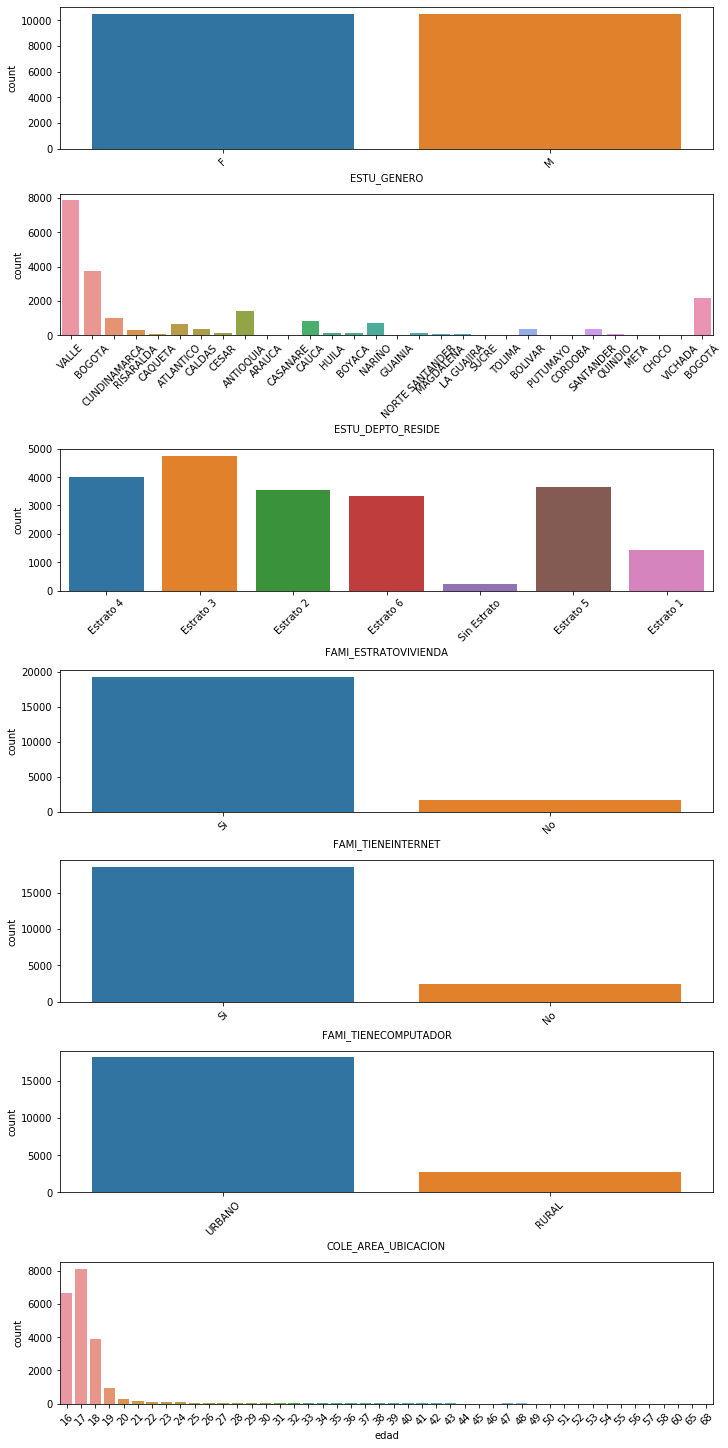

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

columnas_a_analizar = ['ESTU_GENERO','ESTU_DEPTO_RESIDE','FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET','FAMI_TIENECOMPUTADOR','COLE_AREA_UBICACION','edad']
fig, axes = plt.subplots(7, 1,figsize=(10,20),constrained_layout=True)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
    
for i, col in enumerate(columnas_a_analizar):
    sns.countplot(ax=axes[i], x=df2[col])

De estas gráficas se pueden sacar las siguientes conclusiones:

1. En cuanto a los géneros se puede observar que existe una paridad entre el sexo femenino y masculino en cuanto a total de pruebas saber 11 presentadas.

2. Adicionalmente, se puede observar que el mayor número de pruebas saber 11 se presentan en el valle, siguiendolo los departamentos de Cundinamarca y Bogotá.

3. También se puede observar que la mayoría de personas que presentan estas pruebas están entre los estratos 3,4,5 y 6. Esto puede ser un indicador de que por sí existe una predisposición de los estratos bajos (1 y 2) a tomar las pruebas de estado, teniendo en cuenta de que constituyen una gran parte de la población colombiana y aún así tienen menos representantes que estratos como el 6.

4. También se puede observar una relación grande entre la disponibilidad de internet en las casas y si el colegio es urbano o rural, lo cual tiene sentido y se analizará más a detalle posteriormente. 

5. Por último se puede observar que la edad en la que se suele presentar estas pruebas tiene sus máximos entre 16 a 20 años de edad, lo cual tiene sentido puesto que estas pruebas las presentan usualmente los adolescentes próximos a graduarse de bachilleres.

Adicionalmente, se obtienen los porcentajes constituyentes a estas variables para reforzar lo visto hasta ahora en las gráficas:

In [13]:
for col in columnas_a_analizar:
    print('los porcentajes de los valores para la columna ' + col + ' son:')
    print(df2[col].value_counts().sort_values(ascending=False)*100.0/len(df2))
    print('')

los porcentajes de los valores para la columna ESTU_GENERO son:
F    50.126269
M    49.873731
Name: ESTU_GENERO, dtype: float64

los porcentajes de los valores para la columna ESTU_DEPTO_RESIDE son:
VALLE              37.442226
BOGOTA             17.911088
BOGOTÁ             10.268261
ANTIOQUIA           6.756564
CUNDINAMARCA        4.883976
CAUCA               4.035832
NARIÑO              3.316339
ATLANTICO           3.163863
BOLIVAR             1.758231
CALDAS              1.739172
SANTANDER           1.658169
RISARALDA           1.543813
CESAR               0.810025
NORTE SANTANDER     0.681374
BOYACA              0.657550
HUILA               0.571783
MAGDALENA           0.433602
QUINDIO             0.400248
LA GUAJIRA          0.385953
CAQUETA             0.319245
CORDOBA             0.262067
TOLIMA              0.252537
META                0.214418
ARAUCA              0.214418
CASANARE            0.085767
GUAINIA             0.066708
SUCRE               0.066708
PUTUMAYO          

Adicionalmente, también es importante observar el comportamiento de nuestra variable dependiente:

In [14]:
df2['PUNT_GLOBAL'].astype(float).describe()

count    20987.000000
mean       296.572116
std         62.629478
min        123.000000
25%        249.000000
50%        306.000000
75%        347.000000
max        479.000000
Name: PUNT_GLOBAL, dtype: float64

Se puede observar que para estos dos años tenemos un puntaje medio de 296 con una desviación estándar de 62. Esto nos puede servir de un primer indicador para observar que existe una gran brecha entre los estudiantes que presentan estas pruebas.

También es importante observar las relaciones entre variables. Específicamente, queremos observar dos cosas: Si hay relacion entre las variables de respuesta que nos pueda afectar algún modelo de predicción que queramos realizar y si hay relación entre estas variables y la dependiente.

<b> Primero revisaremos la relación entre la variable de respuesta y las variables independientes:

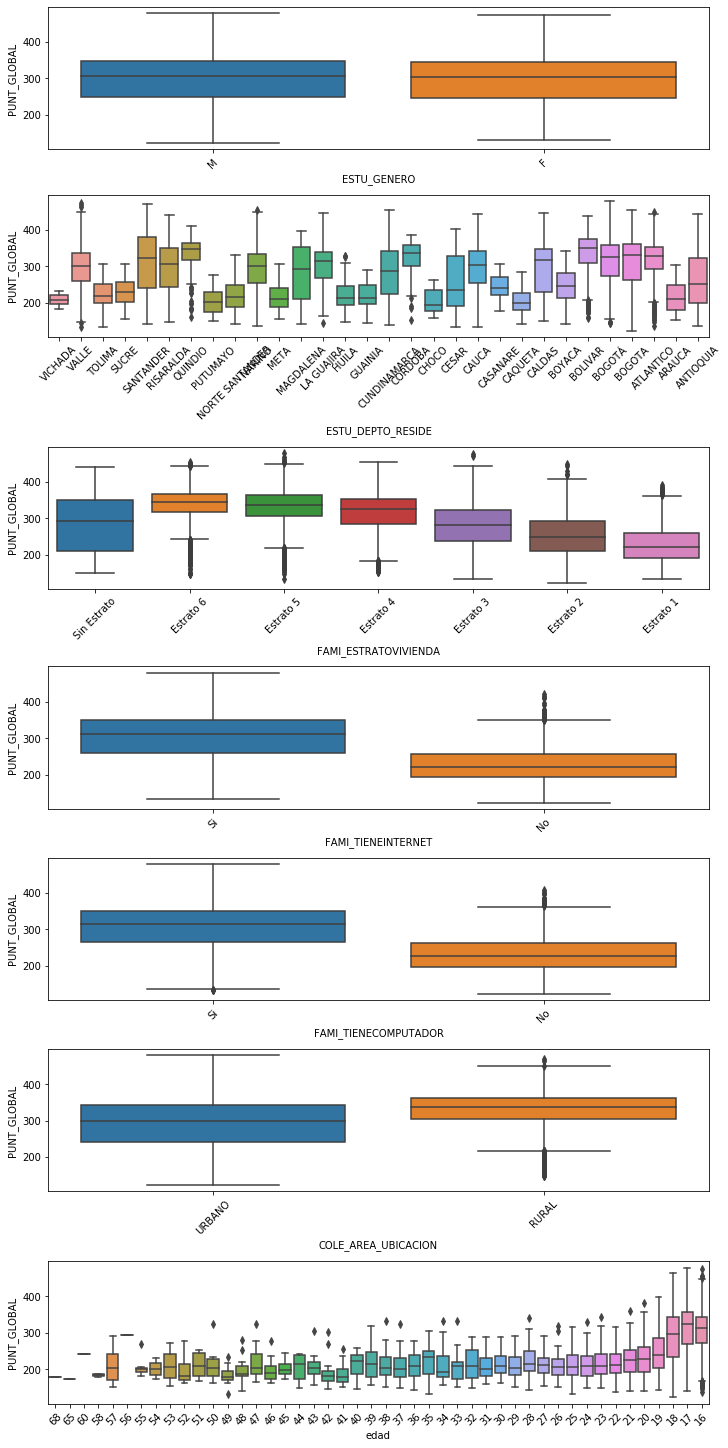

In [15]:
fig, axes = plt.subplots(7, 1,figsize=(10,20),constrained_layout=True)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
    
for i, col in enumerate(columnas_a_analizar):
    my_order = df2.groupby(by=col)["PUNT_GLOBAL"].median().iloc[::-1].index
    sns.boxplot(ax=axes[i], x=df2[col], y=df2['PUNT_GLOBAL'].astype(float), order = my_order) 

Para observar correlacion entre las variables, se utiliza la v de cramer como se muestra a continuación:

In [16]:
import scipy.stats as ss
import numpy as np

def cramers_corrected_stat(dfcolumn1,dfcolumn2):
    
    confusion_matrix = pd.crosstab(dfcolumn1, dfcolumn2)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

for i in df2.columns:
    df_aux = df2.loc[:, df2.columns != i]
    for j in df_aux.columns:
        print('V de cramer entre ' + i + ' y ' + j)
        print(cramers_corrected_stat(df2[i],df2[j]))

V de cramer entre ESTU_GENERO y ESTU_DEPTO_RESIDE
0.05218120786706915
V de cramer entre ESTU_GENERO y FAMI_ESTRATOVIVIENDA
0.04284478727708081
V de cramer entre ESTU_GENERO y FAMI_TIENEINTERNET
0.029700421259967167
V de cramer entre ESTU_GENERO y FAMI_TIENECOMPUTADOR
0.02361454795202063
V de cramer entre ESTU_GENERO y COLE_AREA_UBICACION
0.0
V de cramer entre ESTU_GENERO y PUNT_GLOBAL
0.07182007414801526
V de cramer entre ESTU_GENERO y edad
0.07441272182027149
V de cramer entre ESTU_DEPTO_RESIDE y ESTU_GENERO
0.05218120786706915
V de cramer entre ESTU_DEPTO_RESIDE y FAMI_ESTRATOVIVIENDA
0.2115583779794122
V de cramer entre ESTU_DEPTO_RESIDE y FAMI_TIENEINTERNET
0.30468623002144585
V de cramer entre ESTU_DEPTO_RESIDE y FAMI_TIENECOMPUTADOR
0.279152961034997
V de cramer entre ESTU_DEPTO_RESIDE y COLE_AREA_UBICACION
0.3863946512145576
V de cramer entre ESTU_DEPTO_RESIDE y PUNT_GLOBAL
0.1018386500682892
V de cramer entre ESTU_DEPTO_RESIDE y edad
0.10927880449680435
V de cramer entre FAMI_E

In [17]:
df2 = df2.drop('FAMI_TIENEINTERNET',axis=1)
df2 = df2.drop('ESTU_GENERO',axis=1)
df2.head()

,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,COLE_AREA_UBICACION,PUNT_GLOBAL,edad
0,VALLE,Estrato 4,Si,URBANO,235.0,18
1,VALLE,Estrato 3,No,URBANO,217.0,20
2,VALLE,Estrato 2,No,URBANO,246.0,17
3,VALLE,Estrato 2,Si,URBANO,255.0,24
4,BOGOTA,Estrato 6,Si,URBANO,280.0,18


Se puede observar que existe una muy alta correlación entre tener internet y tener computador, por lo que se decide remover una de estas variables. Adicionalmente, se observa que la relación entre tiene computador y el estrato también es bastante fuerte, sin embargo, se decide proceder solo con la primera remoción mencionada. Adicionalmente, se puede observar que la más alta correlación entre el puntaje y las variables dependientes se da con tener computador, por lo cual se decide que esta será una de las variables de interés más importante, adicional al estrato social que también se puede observar que tiene una relación muy grande.

# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

### Desarrollo

Para evitar problemas con supuestos de normalidad y correlación de variables, se decide realizar un modelo de random forest que intente explicar el riesgo en términos de las variables independientes.

Lo primero que se debe realizar es el cálculo del riesgo mediante el uso de los percentiles. Para esto es necesario redefinir nuestro dataframe con los valores de los percentiles de las áreas de la prueba.

In [18]:
df3 = df[['FAMI_ESTRATOVIVIENDA','FAMI_TIENECOMPUTADOR','COLE_AREA_UBICACION'\
          ,'PUNT_GLOBAL','PERCENTIL_LECTURA_CRITICA','PERCENTIL_MATEMATICAS'\
          ,'PERCENTIL_C_NATURALES','PERCENTIL_SOCIALES_CIUDADANAS','PERCENTIL_INGLES']].copy()
df3.head(2)

,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,COLE_AREA_UBICACION,PUNT_GLOBAL,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_C_NATURALES,PERCENTIL_SOCIALES_CIUDADANAS,PERCENTIL_INGLES
0,Estrato 4,Si,URBANO,235,29,31,33,22,39
1,Estrato 3,No,URBANO,217,35,25,27,10,10


In [19]:
def riesgo_estudiantes(df,percentil):
    total_areas = 5
    # Si existen 3 areas de riesgo, se caracteriza al estudiante como de riesgo
    riesgo = 0
    if df['PERCENTIL_LECTURA_CRITICA'] < percentil:
        riesgo += 1
    if df['PERCENTIL_MATEMATICAS'] < percentil:
        riesgo += 1
    if df['PERCENTIL_C_NATURALES'] < percentil:
        riesgo += 1
    if df['PERCENTIL_SOCIALES_CIUDADANAS'] < percentil:
        riesgo += 1
    if df['PERCENTIL_INGLES'] < percentil:
        riesgo += 1
    
    if riesgo >= 3:
        return 1
    else:
        return 0

df3['riesgo'] = df3.apply(lambda x: riesgo_estudiantes(x,60),axis=1)

In [20]:
df3['riesgo'].value_counts()

1    12913
0    12011
Name: riesgo, dtype: int64

Primero que todo, se puede observar que el dataset está bastante balanceado, por lo que no se considera revisar métodos de desbalanceo para llevar a cabo el modelaje.

In [21]:
#Preparacion de los datos

df3 = pd.get_dummies(df3, prefix='computador', prefix_sep='_', 
                            columns=['FAMI_TIENECOMPUTADOR'],drop_first=True)
df3 = pd.get_dummies(df3, prefix='area', prefix_sep='_', 
                            columns=['COLE_AREA_UBICACION'],drop_first=True)
df3 = pd.get_dummies(df3, prefix='Estrato', prefix_sep='_', 
                            columns=['FAMI_ESTRATOVIVIENDA'],drop_first=True)
df3['riesgo'] = df3['riesgo'].astype("category")
df3 = df3.drop(['PERCENTIL_LECTURA_CRITICA','PERCENTIL_MATEMATICAS'\
,'PERCENTIL_C_NATURALES','PERCENTIL_SOCIALES_CIUDADANAS','PERCENTIL_INGLES','PUNT_GLOBAL'],axis=1)

In [22]:
#Train-test split

from sklearn.model_selection import train_test_split

features = df3.loc[:, df3.columns != 'riesgo']
y = df3['riesgo']

X_train, X_test, Y_train, Y_test = train_test_split(features, y, test_size = 0.3, random_state = 42)

#Modelaje

#Entrenamiento
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

rf.fit(X_train, Y_train)

#Predicción
predictions = rf.predict(X_test)

In [23]:
#Matriz de confusion y metricas

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

print('la matriz de confusión es:')
confusion_matrix(Y_test, predictions)

la matriz de confusión es:


array([[2773,  845],
       [1192, 2668]], dtype=int64)

In [24]:
print('El f1-score es: ',f1_score(Y_test,predictions))

El f1-score es:  0.7237216872372169


Podemos observa que el f1-score es bastante bueno, por lo que se podría decir que este modelo predice en buena manera el comportamiento de los estudiantes en riesgo.

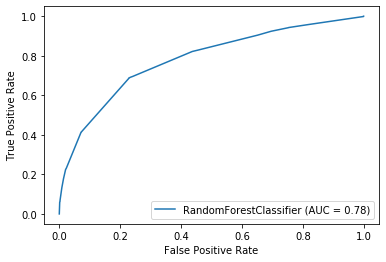

In [25]:
from sklearn.metrics import plot_roc_curve

ax = plt.gca()

rfc_disp = plot_roc_curve(rf, X_test, Y_test, ax=ax)
plt.show()

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

### Desarrollo

La pregunta que hay que responder es cómo cambia el puntaje global con las variables de decisión que se tienen en cuenta en el modelo. Teniendo en cuenta que de todas las variables, la que presuntamente más influye es el estrato, se podría observar cómo se comportan los puntajes de los estudiantes en los diferentes estratos teniendo en cuenta las demás variables.

In [26]:
import panel as pn
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pn.extension('plotly')

In [27]:
df2 = df2.drop(['ESTU_DEPTO_RESIDE','edad'],axis=1)

In [28]:
df4 = df2.groupby(['FAMI_ESTRATOVIVIENDA','FAMI_TIENECOMPUTADOR','COLE_AREA_UBICACION']).agg({'PUNT_GLOBAL':'mean'}).reset_index().rename(columns={'PUNT_GLOBAL':'media'})
df4['cuenta'] = df2.groupby(['FAMI_ESTRATOVIVIENDA','FAMI_TIENECOMPUTADOR','COLE_AREA_UBICACION']).agg({'PUNT_GLOBAL':'count'}).reset_index(drop=True)
df4['desviacion'] = df2.groupby(['FAMI_ESTRATOVIVIENDA','FAMI_TIENECOMPUTADOR','COLE_AREA_UBICACION']).agg({'PUNT_GLOBAL':'std'}).reset_index(drop=True)

In [29]:
df4.head()

,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,COLE_AREA_UBICACION,media,cuenta,desviacion
0,Estrato 1,No,RURAL,227.666667,27,65.984847
1,Estrato 1,No,URBANO,217.052632,741,40.783889
2,Estrato 1,Si,RURAL,265.333333,33,69.202451
3,Estrato 1,Si,URBANO,242.914961,635,56.149718
4,Estrato 2,No,RURAL,226.862069,29,57.676267


In [39]:
titulo = "#DASHBOARD PRUEBAS SABER 11"

seleccion1 = pn.widgets.RadioButtonGroup(name='TIENE COMPUTADOR', options = ['Tiene pc','No tiene pc'])
seleccion2 = pn.widgets.RadioButtonGroup(name='AREA', options = ['URBANO','RURAL'])
seleccion3 = pn.widgets.RadioButtonGroup(name='AGG_FUNCT', options = ['media','cuenta','desviacion'])

In [40]:
@pn.depends(seleccion1.param.value,seleccion2.param.value,seleccion3.param.value)

def funcion_interactiva(seleccion1,seleccion2,seleccion3): 

    # Cargamos los datos.
    df = df4
    
    if seleccion1 == 'Tiene pc':
        
        if seleccion2 == 'URBANO':
            
            if seleccion3 == 'media':
            
                df_aux = df4[(df4['FAMI_TIENECOMPUTADOR']=='Si') & (df4['COLE_AREA_UBICACION']=='URBANO')]
                figura = go.Figure(go.Bar(
                                x=df_aux["media"],
                                y=df_aux['FAMI_ESTRATOVIVIENDA'],
                                text=df_aux['FAMI_ESTRATOVIVIENDA'],
                                textposition='outside',                                # Posición de la etiqueta de datos. En este caso a la derecha.
                                texttemplate='%{text}',                                # Formato de texto.
                                marker_color='rgb(26, 118, 255)',                      # Color de las barras.
                                orientation='h'                                        # Orientación de las barras. En este caso horizontal.
                              )
                       )


                figura.update_layout(
                            barmode='stack',                                           # Tipo de barras. En este caso apiliadas.
                            yaxis_title="Estrato",
                            xaxis_title="Puntaje promedio",
                            title= 'Puntaje promedio por estrato',
                            xaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje x.
                            yaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje y.
                            plot_bgcolor='white',                                      # Modificamos el color del fondo del gráfico.
                            showlegend=False,                                          # Ocultamos la leyenda.
                                                       
                         )
                
            if seleccion3 == 'cuenta':
            
                df_aux = df4[(df4['FAMI_TIENECOMPUTADOR']=='Si') & (df4['COLE_AREA_UBICACION']=='URBANO')]
                figura = go.Figure(go.Bar(
                                    x=df_aux["cuenta"],
                                    y=df_aux['FAMI_ESTRATOVIVIENDA'],
                                    text=df_aux['FAMI_ESTRATOVIVIENDA'],
                                    textposition='outside',                                # Posición de la etiqueta de datos. En este caso a la derecha.
                                    texttemplate='%{text}',                                # Formato de texto.
                                    marker_color='rgb(26, 118, 255)',                      # Color de las barras.
                                    orientation='h'                                        # Orientación de las barras. En este caso horizontal.
                                  )
                           )


                figura.update_layout(
                            barmode='stack',                                           # Tipo de barras. En este caso apiliadas.
                            yaxis_title="Estrato",
                            xaxis_title="Número de estudiantes",
                            title= 'Numero de estudiantes por estrato',
                            xaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje x.
                            yaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje y.
                            plot_bgcolor='white',                                      # Modificamos el color del fondo del gráfico.
                            showlegend=False,                                          # Ocultamos la leyenda.

                         )
                    
            if seleccion3 == 'desviacion':
            
                df_aux = df4[(df4['FAMI_TIENECOMPUTADOR']=='Si') & (df4['COLE_AREA_UBICACION']=='URBANO')]
                figura = go.Figure(go.Bar(
                                    x=df_aux["desviacion"],
                                    y=df_aux['FAMI_ESTRATOVIVIENDA'],
                                    text=df_aux['FAMI_ESTRATOVIVIENDA'],
                                    textposition='outside',                                # Posición de la etiqueta de datos. En este caso a la derecha.
                                    texttemplate='%{text}',                                # Formato de texto.
                                    marker_color='rgb(26, 118, 255)',                      # Color de las barras.
                                    orientation='h'                                        # Orientación de las barras. En este caso horizontal.
                                  )
                           )


                figura.update_layout(
                            barmode='stack',                                           # Tipo de barras. En este caso apiliadas.
                            yaxis_title="Estrato",
                            xaxis_title="Desviacion del puntaje",
                            title= 'Desviación del puntaje por estrato',
                            xaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje x.
                            yaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje y.
                            plot_bgcolor='white',                                      # Modificamos el color del fondo del gráfico.
                            showlegend=False,                                          # Ocultamos la leyenda.

                         )

        if seleccion2 == 'RURAL':
                
            if seleccion3 == 'media':
            
                df_aux = df4[(df4['FAMI_TIENECOMPUTADOR']=='Si') & (df4['COLE_AREA_UBICACION']=='RURAL')]
                figura = go.Figure(go.Bar(
                                x=df_aux["media"],
                                y=df_aux['FAMI_ESTRATOVIVIENDA'],
                                text=df_aux['FAMI_ESTRATOVIVIENDA'],
                                textposition='outside',                                # Posición de la etiqueta de datos. En este caso a la derecha.
                                texttemplate='%{text}',                                # Formato de texto.
                                marker_color='rgb(26, 118, 255)',                      # Color de las barras.
                                orientation='h'                                        # Orientación de las barras. En este caso horizontal.
                              )
                       )


                figura.update_layout(
                            barmode='stack',                                           # Tipo de barras. En este caso apiliadas.
                            yaxis_title="Estrato",
                            xaxis_title="Puntaje promedio",
                            title= 'Puntaje promedio por estrato',
                            xaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje x.
                            yaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje y.
                            plot_bgcolor='white',                                      # Modificamos el color del fondo del gráfico.
                            showlegend=False,                                          # Ocultamos la leyenda.
                                                       
                         )
                
            if seleccion3 == 'cuenta':
            
                df_aux = df4[(df4['FAMI_TIENECOMPUTADOR']=='Si') & (df4['COLE_AREA_UBICACION']=='RURAL')]
                figura = go.Figure(go.Bar(
                                x=df_aux["cuenta"],
                                y=df_aux['FAMI_ESTRATOVIVIENDA'],
                                text=df_aux['FAMI_ESTRATOVIVIENDA'],
                                textposition='outside',                                # Posición de la etiqueta de datos. En este caso a la derecha.
                                texttemplate='%{text}',                                # Formato de texto.
                                marker_color='rgb(26, 118, 255)',                      # Color de las barras.
                                orientation='h'                                        # Orientación de las barras. En este caso horizontal.
                              )
                       )


                figura.update_layout(
                            barmode='stack',                                           # Tipo de barras. En este caso apiliadas.
                            yaxis_title="Estrato",
                            xaxis_title="Número de estudiantes",
                            title= 'Numero de estudiantes por estrato',
                            xaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje x.
                            yaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje y.
                            plot_bgcolor='white',                                      # Modificamos el color del fondo del gráfico.
                            showlegend=False,                                          # Ocultamos la leyenda.

                         )
                    
            if seleccion3 == 'desviacion':
            
                df_aux = df4[(df4['FAMI_TIENECOMPUTADOR']=='Si') & (df4['COLE_AREA_UBICACION']=='RURAL')]
                figura = go.Figure(go.Bar(
                                x=df_aux["desviacion"],
                                y=df_aux['FAMI_ESTRATOVIVIENDA'],
                                text=df_aux['FAMI_ESTRATOVIVIENDA'],
                                textposition='outside',                                # Posición de la etiqueta de datos. En este caso a la derecha.
                                texttemplate='%{text}',                                # Formato de texto.
                                marker_color='rgb(26, 118, 255)',                      # Color de las barras.
                                orientation='h'                                        # Orientación de las barras. En este caso horizontal.
                              )
                       )


                figura.update_layout(
                            barmode='stack',                                           # Tipo de barras. En este caso apiliadas.
                            yaxis_title="Estrato",
                            xaxis_title="Desviacion del puntaje",
                            title= 'Desviación del puntaje por estrato',
                            xaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje x.
                            yaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje y.
                            plot_bgcolor='white',                                      # Modificamos el color del fondo del gráfico.
                            showlegend=False,                                          # Ocultamos la leyenda.

                         )
    if seleccion1 == 'No tiene pc':
        
        if seleccion2 == 'URBANO':
            
            if seleccion3 == 'media':
            
                df_aux = df4[(df4['FAMI_TIENECOMPUTADOR']=='No') & (df4['COLE_AREA_UBICACION']=='URBANO')]
                figura = go.Figure(go.Bar(
                                x=df_aux["media"],
                                y=df_aux['FAMI_ESTRATOVIVIENDA'],
                                text=df_aux['FAMI_ESTRATOVIVIENDA'],
                                textposition='outside',                                # Posición de la etiqueta de datos. En este caso a la derecha.
                                texttemplate='%{text}',                                # Formato de texto.
                                marker_color='rgb(26, 118, 255)',                      # Color de las barras.
                                orientation='h'                                        # Orientación de las barras. En este caso horizontal.
                              )
                       )


                figura.update_layout(
                            barmode='stack',                                           # Tipo de barras. En este caso apiliadas.
                            yaxis_title="Estrato",
                            xaxis_title="Puntaje promedio",
                            title= 'Puntaje promedio por estrato',
                            xaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje x.
                            yaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje y.
                            plot_bgcolor='white',                                      # Modificamos el color del fondo del gráfico.
                            showlegend=False,                                          # Ocultamos la leyenda.
                                                       
                         )
                
            if seleccion3 == 'cuenta':
            
                df_aux = df4[(df4['FAMI_TIENECOMPUTADOR']=='No') & (df4['COLE_AREA_UBICACION']=='URBANO')]
                figura = go.Figure(go.Bar(
                                x=df_aux["cuenta"],
                                y=df_aux['FAMI_ESTRATOVIVIENDA'],
                                text=df_aux['FAMI_ESTRATOVIVIENDA'],
                                textposition='outside',                                # Posición de la etiqueta de datos. En este caso a la derecha.
                                texttemplate='%{text}',                                # Formato de texto.
                                marker_color='rgb(26, 118, 255)',                      # Color de las barras.
                                orientation='h'                                        # Orientación de las barras. En este caso horizontal.
                              )
                       )


                figura.update_layout(
                            barmode='stack',                                           # Tipo de barras. En este caso apiliadas.
                            yaxis_title="Estrato",
                            xaxis_title="Número de estudiantes",
                            title= 'Numero de estudiantes por estrato',
                            xaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje x.
                            yaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje y.
                            plot_bgcolor='white',                                      # Modificamos el color del fondo del gráfico.
                            showlegend=False,                                          # Ocultamos la leyenda.

                         )
                    
            if seleccion3 == 'desviacion':
            
                df_aux = df4[(df4['FAMI_TIENECOMPUTADOR']=='No') & (df4['COLE_AREA_UBICACION']=='URBANO')]
                figura = go.Figure(go.Bar(
                                x=df_aux["desviacion"],
                                y=df_aux['FAMI_ESTRATOVIVIENDA'],
                                text=df_aux['FAMI_ESTRATOVIVIENDA'],
                                textposition='outside',                                # Posición de la etiqueta de datos. En este caso a la derecha.
                                texttemplate='%{text}',                                # Formato de texto.
                                marker_color='rgb(26, 118, 255)',                      # Color de las barras.
                                orientation='h'                                        # Orientación de las barras. En este caso horizontal.
                              )
                       )


                figura.update_layout(
                            barmode='stack',                                           # Tipo de barras. En este caso apiliadas.
                            yaxis_title="Estrato",
                            xaxis_title="Desviacion del puntaje",
                            title= 'Desviación del puntaje por estrato',
                            xaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje x.
                            yaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje y.
                            plot_bgcolor='white',                                      # Modificamos el color del fondo del gráfico.
                            showlegend=False,                                          # Ocultamos la leyenda.

                         )
                    
        if seleccion2 == 'RURAL':
                
            if seleccion3 == 'media':
            
                df_aux = df4[(df4['FAMI_TIENECOMPUTADOR']=='No') & (df4['COLE_AREA_UBICACION']=='RURAL')]
                figura = go.Figure(go.Bar(
                                x=df_aux["media"],
                                y=df_aux['FAMI_ESTRATOVIVIENDA'],
                                text=df_aux['FAMI_ESTRATOVIVIENDA'],
                                textposition='outside',                                # Posición de la etiqueta de datos. En este caso a la derecha.
                                texttemplate='%{text}',                                # Formato de texto.
                                marker_color='rgb(26, 118, 255)',                      # Color de las barras.
                                orientation='h'                                        # Orientación de las barras. En este caso horizontal.
                              )
                       )


                figura.update_layout(
                            barmode='stack',                                           # Tipo de barras. En este caso apiliadas.
                            yaxis_title="Estrato",
                            xaxis_title="Puntaje promedio",
                            title= 'Puntaje promedio por estrato',
                            xaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje x.
                            yaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje y.
                            plot_bgcolor='white',                                      # Modificamos el color del fondo del gráfico.
                            showlegend=False,                                          # Ocultamos la leyenda.
                                                       
                         )
                
            if seleccion3 == 'cuenta':

                df_aux = df4[(df4['FAMI_TIENECOMPUTADOR']=='No') & (df4['COLE_AREA_UBICACION']=='RURAL')]
                figura = go.Figure(go.Bar(
                                x=df_aux["cuenta"],
                                y=df_aux['FAMI_ESTRATOVIVIENDA'],
                                text=df_aux['FAMI_ESTRATOVIVIENDA'],
                                textposition='outside',                                # Posición de la etiqueta de datos. En este caso a la derecha.
                                texttemplate='%{text}',                                # Formato de texto.
                                marker_color='rgb(26, 118, 255)',                      # Color de las barras.
                                orientation='h'                                        # Orientación de las barras. En este caso horizontal.
                              )
                       )


                figura.update_layout(
                            barmode='stack',                                           # Tipo de barras. En este caso apiliadas.
                            yaxis_title="Estrato",
                            xaxis_title="Número de estudiantes",
                            title= 'Numero de estudiantes por estrato',
                            xaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje x.
                            yaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje y.
                            plot_bgcolor='white',                                      # Modificamos el color del fondo del gráfico.
                            showlegend=False,                                          # Ocultamos la leyenda.

                         )

            if seleccion3 == 'desviacion':
            
                df_aux = df4[(df4['FAMI_TIENECOMPUTADOR']=='No') & (df4['COLE_AREA_UBICACION']=='RURAL')]
                figura = go.Figure(go.Bar(
                                x=df_aux["desviacion"],
                                y=df_aux['FAMI_ESTRATOVIVIENDA'],
                                text=df_aux['FAMI_ESTRATOVIVIENDA'],
                                textposition='outside',                                # Posición de la etiqueta de datos. En este caso a la derecha.
                                texttemplate='%{text}',                                # Formato de texto.
                                marker_color='rgb(26, 118, 255)',                      # Color de las barras.
                                orientation='h'                                        # Orientación de las barras. En este caso horizontal.
                              )
                       )


                figura.update_layout(
                            barmode='stack',                                           # Tipo de barras. En este caso apiliadas.
                            yaxis_title="Estrato",
                            xaxis_title="Desviacion del puntaje",
                            title= 'Desviación del puntaje por estrato',
                            xaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje x.
                            yaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje y.
                            plot_bgcolor='white',                                      # Modificamos el color del fondo del gráfico.
                            showlegend=False,                                          # Ocultamos la leyenda.

                         )
    return figura 

In [41]:
tablero_control = pn.Row(pn.Column(titulo, seleccion1, seleccion2,seleccion3, funcion_interactiva))

In [42]:
tablero_control.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] RadioButtonGroup(name='TIENE COMPUTADOR', options=['Tiene pc', '...], value='Tiene pc')
        [2] RadioButtonGroup(name='AREA', options=['URBANO', 'RURAL'], value='URBANO')
        [3] RadioButtonGroup(name='AGG_FUNCT', options=['media', 'cuenta', ...], value='media')
        [4] ParamFunction(function)